# 01 starting point
2017-02-11


## Summary

* Daniele completed his work of migrating Andres's 2pt_correlation, and he has confirmed that the **new code agrees with the original code** in the 2pt_correlation GitHub repository.
* The result of two codes, however, does not agree with the reference results Andres gave us; we are not sure which results are correct.
* A plot of a grid shows an **error of mass assignment at the border**
* The power spectrum of white noise computed by the code is **unsatifactory**.

## White noise

`data/white_mock_1000_2.5e-4.txt`

```
white_mock --boxsize=1000 --nbar=2.5e-4 > white_mock_1000_2.5e-4.txt
```

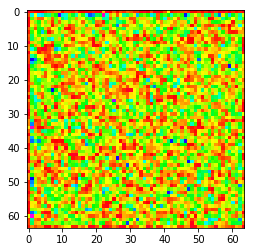

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
sys.path.append('../../script')
import grid

a = grid.read('grid_white_64.b')
plt.imshow(a[:,:, 32], cmap=cm.gist_rainbow)
plt.show()

```bash
euclidps/lib/compute_power_spectrum --write-data-grid=grid_white_64.b param_white.ini >& white.log
```

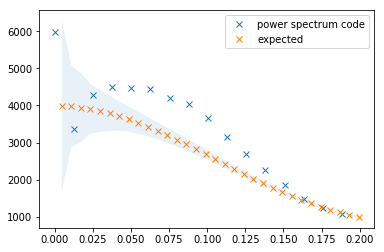

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

a = np.loadtxt('rome_1d.dat')
plt.plot(a[:,0], a[:, 1], 'x', label='power spectrum code')

a = np.loadtxt('white_power_64.txt')
k = a[:,0]
P = a[:, 3]
dP = a[:, 3]/np.sqrt(a[:, 2])
plt.plot(k, P, 'x', label='expected')
plt.fill_between(k, P - dP, P + dP, alpha=0.1)
plt.legend()

plt.show()